# Unsupervised ML
## Association Rule mining (e.g MBA (MARKET BASKET ANALYSIS)
### APRIORI ALGORITHM

In [9]:
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam', 'butter'],
    ['bread', 'jam']
]

In [28]:
data

[['milk', 'bread', 'butter'],
 ['bread', 'butter'],
 ['milk', 'bread'],
 ['milk', 'bread', 'jam', 'butter'],
 ['bread', 'jam']]

In [30]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 245.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 476.3 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 986.4 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.4 MB 2.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 2.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.4 MB 2.6 MB/s eta 0:00:01
   -----------------------------

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [27]:
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam', 'butter'],
    ['bread', 'jam']
]

In [28]:
te =  TransactionEncoder()

In [29]:
te.ary= te.fit(data).transform(data)

In [30]:
df = pd.DataFrame(te.ary,columns = te.columns_)

In [31]:
df.head()

,bread,butter,jam,milk
0,True,True,False,True
1,True,True,False,False
2,True,False,False,True
3,True,True,True,True
4,True,False,True,False


In [32]:
df.isnull().sum()

bread     0
butter    0
jam       0
milk      0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bread   5 non-null      bool 
 1   butter  5 non-null      bool 
 2   jam     5 non-null      bool 
 3   milk    5 non-null      bool 
dtypes: bool(4)
memory usage: 152.0 bytes


In [34]:
df.columns

Index(['bread', 'butter', 'jam', 'milk'], dtype='object')

In [35]:
df.shape

(5, 4)

In [36]:
df.describe().T

,count,unique,top,freq
bread,5,1,True,5
butter,5,2,True,3
jam,5,2,False,3
milk,5,2,True,3


# Step 3
## Applying Apriori Algo to find frequent items

In [37]:
items = apriori(df,min_support = 0.6, use_colnames = True)

## Generating Association Rules 

In [38]:
rules = association_rules(items, metric = 'confidence', min_threshold = 0.7)

C:\Users\ASIF MANZOOR\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## Show the rules

In [39]:
print(items)

   support         itemsets
0      1.0          (bread)
1      0.6         (butter)
2      0.6           (milk)
3      0.6  (butter, bread)
4      0.6    (milk, bread)


In [41]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(butter),(bread),0.6,1.0,0.6,1.0,1.0,1.0,0.0,inf,0.0,0.6,0.0,0.8
1,(milk),(bread),0.6,1.0,0.6,1.0,1.0,1.0,0.0,inf,0.0,0.6,0.0,0.8


# UNSUPERVISED ALGORITHMS
## Association Rule mining (e.g MBA (MARKET BASKET ANALYSIS)
### APRIORI ALGORITHM ON Retail Dataset

## Step 1
## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2
## Imorting Dataset

In [3]:
data = pd.read_csv("online_retail.csv")

# Step 3
## Data Exploration 

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.shape

(541909, 8)

In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Step 4
## Data Preprocessesing


In [10]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
data.dropna(inplace = True)

In [12]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
data['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [14]:
data = data[data["Quantity"]> 0]

In [15]:
data['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [16]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [17]:
data = data[data["Country"] != 'Unspecified']

In [18]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [19]:
data['InvoiceDate'].unique()

array(['2010-12-01 08:26:00', '2010-12-01 08:28:00',
       '2010-12-01 08:34:00', ..., '2011-12-09 12:31:00',
       '2011-12-09 12:49:00', '2011-12-09 12:50:00'], dtype=object)

In [20]:
basket = data.groupby(['InvoiceDate', 'Description'])['Quantity'].sum().unstack().fillna(0)

basket = basket.applymap(lambda x:1 if x>0 else 0)

C:\Users\ASIF MANZOOR\AppData\Local\Temp\ipykernel_63984\3440468580.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x:1 if x>0 else 0)


In [21]:
data['Quantity'].unique()


array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [22]:
data['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)


## Applying Apriori Algo 

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items = apriori(basket,min_support=0.02, use_colnames=True)

C:\Users\ASIF MANZOOR\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [24]:
frequent_items.head()

,support,itemsets
0,0.023092,(3 STRIPEY MICE FELTCRAFT)
1,0.020892,(4 TRADITIONAL SPINNING TOPS)
2,0.041901,(6 RIBBONS RUSTIC CHARM)
3,0.020487,(60 CAKE CASES DOLLY GIRL DESIGN)
4,0.026738,(60 CAKE CASES VINTAGE CHRISTMAS)


In [25]:
#sort
print(frequent_items.sort_values(by='support',ascending = True).head(10))

      support                                           itemsets
33   0.020024                   (CHRISTMAS CRAFT TREE TOP ANGEL)
156  0.020024                        (POPPY'S PLAYHOUSE KITCHEN)
215  0.020082                  (VINTAGE DOILY TRAVEL SEWING KIT)
255  0.020082      (LUNCH BAG WOODLAND, LUNCH BAG  BLACK SKULL.)
121  0.020082                     (MEMO BOARD RETROSPOT  DESIGN)
183  0.020140                       (SET OF 10 LED DOLLY LIGHTS)
22   0.020198                  (BLUE STRIPE CERAMIC DRAWER KNOB)
175  0.020198                            (REGENCY TEAPOT ROSES )
122  0.020198                  (METAL SIGN TAKE IT OR LEAVE IT )
246  0.020198  (JUMBO BAG RED RETROSPOT, JUMBO BAG VINTAGE LEAF)


In [26]:
#sort
print(frequent_items.sort_values(by='support',ascending = False).head(10))

      support                              itemsets
219  0.113085  (WHITE HANGING HEART T-LIGHT HOLDER)
174  0.097749            (REGENCY CAKESTAND 3 TIER)
92   0.091903             (JUMBO BAG RED RETROSPOT)
140  0.079345                       (PARTY BUNTING)
14   0.078824       (ASSORTED COLOUR BIRD ORNAMENT)
114  0.073789             (LUNCH BAG RED RETROSPOT)
189  0.065976   (SET OF 3 CAKE TINS PANTRY DESIGN )
157  0.063024                             (POSTAGE)
107  0.060652             (LUNCH BAG  BLACK SKULL.)
131  0.059378     (PACK OF 72 RETROSPOT CAKE CASES)


In [27]:
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.8)

In [28]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.032178,0.039875,0.026622,0.827338,20.748295,1.0,0.025339,5.560724,0.983448,0.585987,0.820167,0.747486
1,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.026622,0.044968,0.022571,0.847826,18.854037,1.0,0.021374,6.275925,0.972860,0.460449,0.840661,0.674878
2,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.025233,0.039875,0.022571,0.894495,22.432491,1.0,0.021565,9.100315,0.980154,0.530612,0.890114,0.730267


In [29]:
print(rules[['antecedents','consequents','support', 'confidence','lift']].sort_values(by='confidence', ascending = False).head())

                                         antecedents  \
2  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   
1  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   
0                   (PINK REGENCY TEACUP AND SAUCER)   

                          consequents   support  confidence       lift  
2   (GREEN REGENCY TEACUP AND SAUCER)  0.022571    0.894495  22.432491  
1  (ROSES REGENCY TEACUP AND SAUCER )  0.022571    0.847826  18.854037  
0   (GREEN REGENCY TEACUP AND SAUCER)  0.026622    0.827338  20.748295  


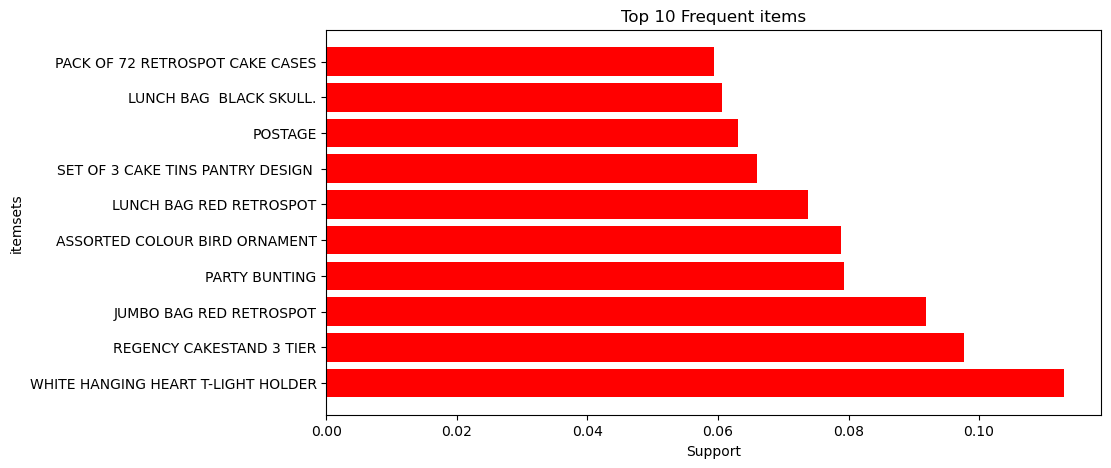

In [32]:
#Visualization
import matplotlib.pyplot as plt

top_items= frequent_items.sort_values(by='support',ascending = False).head(10)
top_items['itemsets']= top_items['itemsets'].apply(lambda x: ','.join(list(x)))
plt.figure(figsize=(10,5))
plt.barh(top_items['itemsets'], top_items['support'], color ='red')
plt.xlabel("Support")
plt.ylabel("itemsets")
plt.title("Top 10 Frequent items")
plt.show()

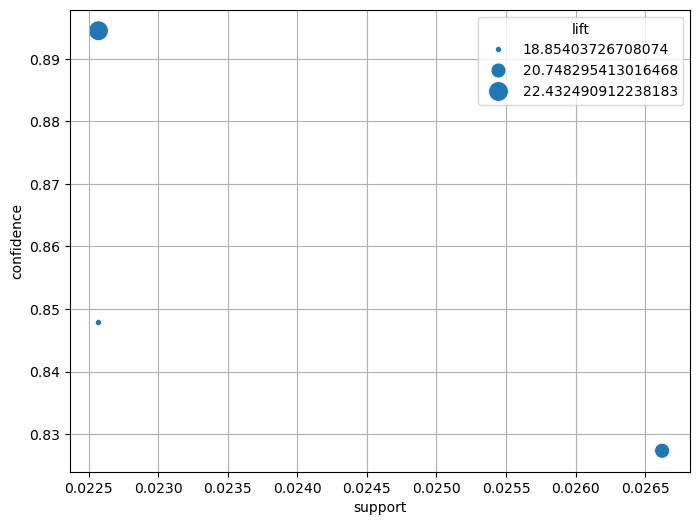

In [35]:
#support vs confidence
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='support', y='confidence', size='lift',sizes =(20,200), data=rules)
plt.xlabel("support")
plt.ylabel("confidence")
plt.grid()
plt.show()

# 3. Dimensionality Reduction
- Dimension Reduction means when we have a large dataset with too many features, that can cause issues like overfitting or low accuracy
- It helps in reducing the number of features while retaining our key info.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397680 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397680 non-null  object 
 1   StockCode    397680 non-null  object 
 2   Description  397680 non-null  object 
 3   Quantity     397680 non-null  int64  
 4   InvoiceDate  397680 non-null  object 
 5   UnitPrice    397680 non-null  float64
 6   CustomerID   397680 non-null  float64
 7   Country      397680 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


## Why Dimensionality Reduction?
- It will slow down model
- it may cause overfitting(model learns  from noise)

## What are the Techniques?
- PCA ( Principal component Analysis)
  
- t-SNE ( T- Distributed Stochastic Neigbhor Embedding)

### 1. PCA ( Principal component Analysis)
it finds new features, we also called them principal components.
- they are fewer in number and  are most important ones.
- these features are combinations of the old ones.

### Real example:
wall mart:
1. Age
2. income
3. spending score
4. time spend in a store
5. no. of products you brought
6. total transaction
7. country
8. city
9. invoice number
10. customer name
11. Description of the itmes



### 2. - t-SNE ( T- Distributed Stochastic Neigbhor Embedding)
- It works for plotting(visuals)
- it is slower than PCA

# HOMEWORK FOR MONDAY
- UNDERSTAND - ML-TYPES-DATA CLEANING , HOW WE DO. linear regression ( pratice, Iris )
- undestand Unsupervised ML
- Unsupervised ML types